In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Carrega os dados do arquivo JSON
df = pd.read_json("imoveis.json")

# Verifica os dados e as colunas (ex: 'titulo', 'tipo', 'endereco', 'bairro', etc.)
print("Colunas disponíveis:", df.columns.tolist())

df.shape

Colunas disponíveis: ['titulo', 'tipo', 'endereco', 'bairro', 'link', 'preco', 'quartos', 'vagas', 'area_total', 'imobiliaria']


(1011, 10)

In [2]:
#TRANSFORMAÇÕES DO DF

def convert_preco(preco_str):
    if isinstance(preco_str, str):
        # Remove "R$" e espaços, retira o separador de milhar e troca a vírgula por ponto.
        preco_str = preco_str.replace("R$", "").strip()
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            # Remove os centavos, convertendo para int, e depois retorna como float (3474.0 por exemplo)
            return float(int(valor))
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return None
    return preco_str


# Converte a coluna 'quartos' para numérico (inteiro)
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Converte 'area_total' para numérico (assumindo que ela venha apenas como número em m²)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')

# Converte 'preco' para float utilizando a função auxiliar
df['preco'] = df['preco'].apply(convert_preco)

# Cria um novo DataFrame apenas com imóveis que tenham 2 ou mais quartos
df_2plus = df[df['quartos'] >= 2].copy()

In [3]:
df.head()

,titulo,tipo,endereco,bairro,link,preco,quartos,vagas,area_total,imobiliaria
0,Garagem Centro,Garagem,"Avenida Hercilio Luz, 853, Centro - Florianópolis",Centro,https://ibagy.com.br/imovel/118587/garagem-and...,290.0,NaN,,NaN,ibagy
1,Kitnet/Loft/Studio 1 Quarto Trindade 12m²,Kitnet/Loft/Studio,"Rua Professora Enoe Schutel, 179, Trindade - F...",Trindade,https://ibagy.com.br/imovel/81818/kitnet_loft_...,968.0,1.0,,12.0,ibagy
2,Kitnet/Loft/Studio Ponte Do Imaruim 49m²,Kitnet/Loft/Studio,"Rua Nascente Do Sol, 287, Ponte Do Imaruim - P...",Ponte Do Imaruim,https://ibagy.com.br/imovel/127152/kitnet_loft...,1000.0,NaN,,49.0,ibagy
3,Kitnet/Loft/Studio 1 Quarto Potecas 40m²,Kitnet/Loft/Studio,"Rua Rua João Sebastião Da Conceição Filho, 611...",Potecas,https://ibagy.com.br/imovel/127393/kitnet_loft...,1100.0,1.0,,40.0,ibagy
4,Kitnet/Loft/Studio 1 Quarto Trindade 20m²,Kitnet/Loft/Studio,"Rua Professora Maria Luiza Rodrigues, 136, Tri...",Trindade,https://ibagy.com.br/imovel/121129/kitnet_loft...,1140.0,1.0,,20.0,ibagy


In [33]:
df_2plus.shape

(812, 11)

In [4]:
# Agrupa os imóveis por bairro e conta quantos apartamentos há em cada grupo
bairro_counts = df.groupby("bairro").size().sort_values(ascending=False)

# Exibe os números (para conferência)
print(bairro_counts)

bairro
Centro                      125
Campeche                     52
Ingleses Do Rio Vermelho     51
Trindade                     49
Pedra Branca                 41
                           ... 
Santo Antônio                 1
São Joao Do Rio Vermelho      1
Sertao Do Maruim              1
Tapera                        1
Vargem Do Bom Jesus           1
Length: 120, dtype: int64


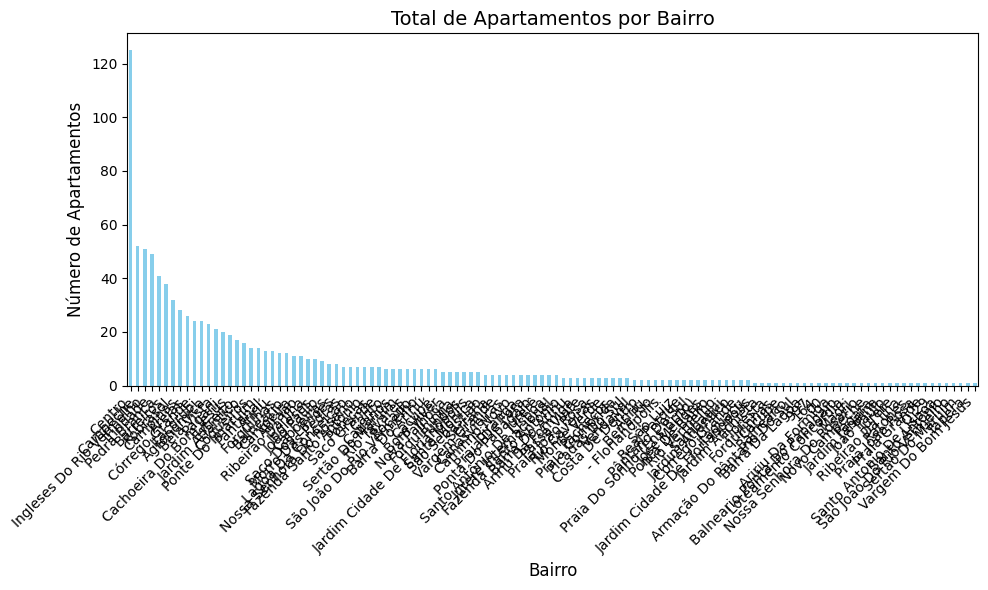

In [5]:
# Cria um gráfico de barras com o total de apartamentos por bairro
plt.figure(figsize=(10, 6))
bairro_counts.plot(kind="bar", color="skyblue")

plt.xlabel("Bairro", fontsize=12)
plt.ylabel("Número de Apartamentos", fontsize=12)
plt.title("Total de Apartamentos por Bairro", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [8]:
# Cria uma nova coluna com o valor do m²: preço dividido pela área total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² dos imóveis com 2 quartos
avg_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² dos imóveis com 3 quartos
avg_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² dos imóveis com 2 quartos:", avg_m2_2)
print("Média do valor por m² dos imóveis com 3 quartos:", avg_m2_3)

Média do valor por m² dos imóveis com 2 quartos: 51.41843951639596
Média do valor por m² dos imóveis com 3 quartos: 53.146063356112094


Acima eu consegui ver a média dos preços dos imóveis com 2 e 3 quartos. Mas esse valor corresponde a todos os bairros. Mas na prática, eu ja sabia quais os bairros que estava interessado, por isso me interessava mais saber as médias dos mesmos.

In [40]:
# Filtra os imóveis com 2 ou mais quartos
# df_2plus = df[df['quartos'] >= 2].copy()

# Filtra somente os imóveis dos bairros desejados
# Usamos lower-case para garantir correspondência
df_2plus['bairro_lower'] = df_2plus['bairro'].str.lower()
bairros_interese = [b.lower() for b in ["Trindade", "Kobrasol", "Capoeiras", "Campinas", "Jardim Atlântico", "Estreito"]]
df_2plus = df_2plus[df_2plus['bairro_lower'].isin(bairros_interese)]

# Cria a coluna com o valor do m²: preço dividido pela área_total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² para imóveis com 2 quartos
media_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² para imóveis com 3 quartos
media_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² para imóveis com 2 quartos nos bairros escolhidos:", media_m2_2)
print("Média do valor por m² para imóveis com 3 quartos nos bairros escolhidos:", media_m2_3)


Média do valor por m² para imóveis com 2 quartos nos bairros escolhidos: 58.61643947010152
Média do valor por m² para imóveis com 3 quartos nos bairros escolhidos: 52.29076855711835


Agora sim eu tenho o valor médio dos imóveis dos bairros desejados.

In [36]:
# Filtra somente os imóveis dos bairros desejados
# Usamos lower-case para garantir correspondência
df_2plus['bairro_lower'] = df_2plus['bairro'].str.lower()
bairros_validos = [b.lower() for b in ["João Paulo", "Agronômica", "Trindade", "Centro"]]
df_2plus = df_2plus[df_2plus['bairro_lower'].isin(bairros_validos)]

# Cria a coluna com o valor do m²: preço dividido pela área_total
df_2plus['m2_price'] = df_2plus['preco'] / df_2plus['area_total']

# Calcula a média do valor do m² para imóveis com 2 quartos
media_m2_2 = df_2plus[df_2plus['quartos'] == 2]['m2_price'].mean()

# Calcula a média do valor do m² para imóveis com 3 quartos
media_m2_3 = df_2plus[df_2plus['quartos'] == 3]['m2_price'].mean()

print("Média do valor por m² para imóveis com 2 quartos:", media_m2_2)
print("Média do valor por m² para imóveis com 3 quartos:", media_m2_3)

Média do valor por m² para imóveis com 2 quartos: 58.61643947010152
Média do valor por m² para imóveis com 3 quartos: 52.29076855711835


Em Florianópolis todos falam que morar na ilha é muito mais caro. Para verificar se isso se aplica de fato, eu fiz a mesma consulta dos bairros de interesse com os bairros centrais e de fato na ilha os imóveis tem uma média superior, mas a diferença ja deve ter sido maior, pois hoje em dia não existe uma disparidade de valores.

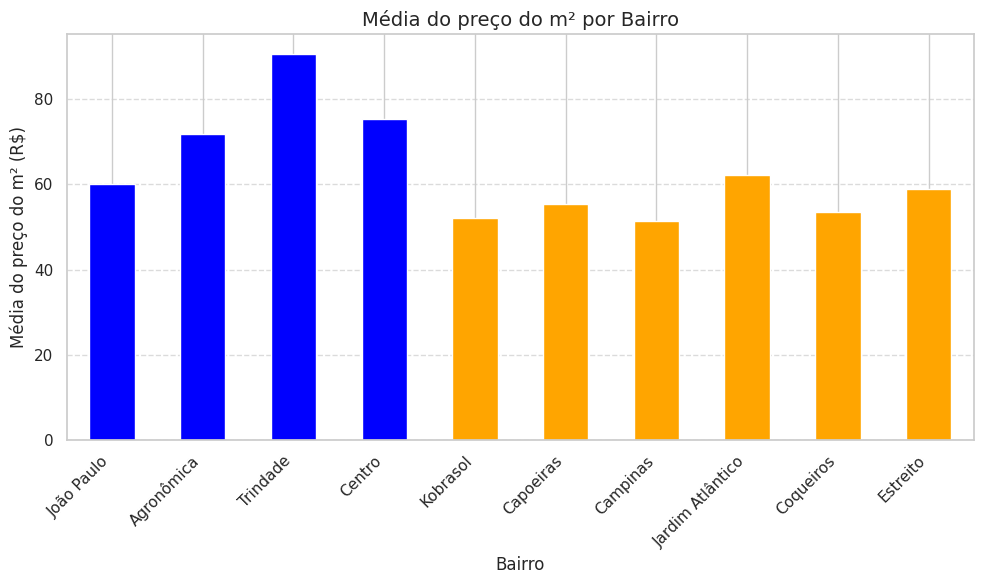

In [37]:
plt.figure(figsize=(10,6))
media_m2_por_bairro.plot(kind="bar", color=["blue"] * 4 + ["orange"] * (len(media_m2_por_bairro) - 4))
plt.xlabel("Bairro", fontsize=12)
plt.ylabel("Média do preço do m² (R$)", fontsize=12)
plt.title("Média do preço do m² por Bairro", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Para ficar mais fácil de ver essas médias, plotei as média em um gráfica de barras. Os bairros em azul são da região central e os demais são os bairros do meu interesse (bairros estes que ficam na região continental). Alguns bairros no continente já estão com a média acima (e outros muito próximo) de bairros na ilha.

Bairros comuns nas 3 imobiliárias: {'agronômica', 'córrego grande', 'joão paulo', 'centro', 'trindade'}
Média do preço do m² (dados agrupados):
  bairro_padronizado quartos  m2_price_mean
0         Agronômica     2.0      69.003808
1             Centro     2.0      82.751569
2     Córrego Grande     2.0      86.460363
3         João Paulo     2.0      60.341062
4           Trindade     2.0      60.066699
5         Agronômica     3.0     103.342910
6             Centro     3.0      67.019729
7     Córrego Grande     3.0      63.317091
8         João Paulo     3.0      75.412169
9           Trindade     3.0      54.860161


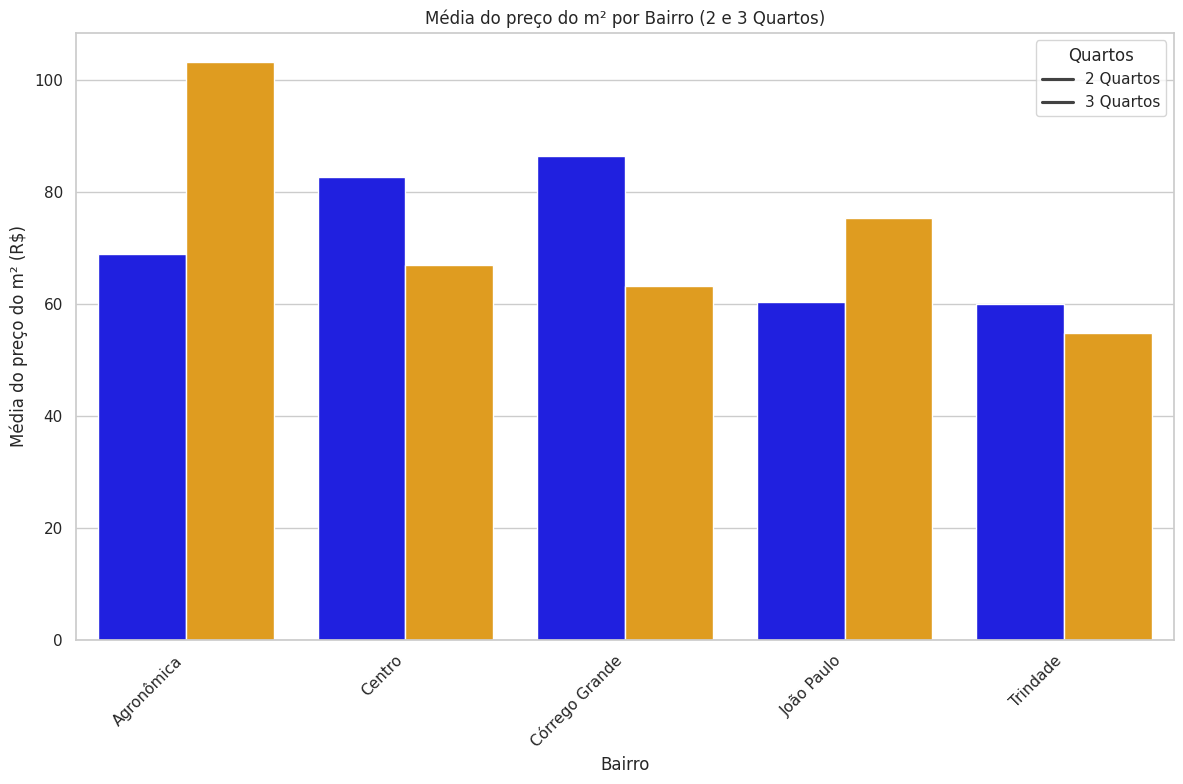

In [30]:
import numpy as np

# Configura o estilo do Seaborn e tamanho de fonte
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Mapeamento dos arquivos com o nome da imobiliária correspondente
arquivos = {
    "imoveis.json": "ibagy",
    "imoveis_piramides.json": "piramides",
    "imoveis_dalton.json": "daltonandrade"
}

# Função para carregar cada JSON e adicionar a coluna "imobiliaria"
def carregar_dados(arquivo, nome_imob):
    df = pd.read_json(arquivo)
    if 'imobiliaria' not in df.columns:
        df['imobiliaria'] = nome_imob
    return df

# Carrega e concatena os DataFrames
dfs = [carregar_dados(arquivo, nome) for arquivo, nome in arquivos.items()]
df = pd.concat(dfs, ignore_index=True)

# Função para converter o preço removendo os centavos.
# Exemplo: "R$ 3.957,00" → 3957.0; se a string estiver vazia, retorna np.nan
def convert_preco(preco_str):
    if isinstance(preco_str, str) and preco_str.strip():
        preco_str = preco_str.replace("R$", "").strip()
        # Remove separador de milhar e troca vírgula por ponto
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            return float(int(valor))  # descarta a parte decimal
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return np.nan
    return np.nan

# Converte preços, área e quartos
df['preco'] = df['preco'].apply(convert_preco)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Calcula o preço por metro quadrado
df['m2_price'] = df['preco'] / df['area_total']

# --- Preenchendo o bairro, se estiver vazio ---
# Se o campo "bairro" estiver vazio (ou for string vazia), tenta extrair a partir de "endereco".
def preencher_bairro(row):
    bairro = str(row.get("bairro", "")).strip()
    if not bairro:
        endereco = str(row.get("endereco", "")).strip()
        # Caso o endereço contenha " - ", vamos usar a parte anterior
        if " - " in endereco:
            return endereco.split(" - ")[0].strip()
        # Caso contenha vírgula, tenta o mesmo a partir da terceira parte (padrão "Rua X, Número, Bairro - ...")
        partes = endereco.split(',')
        if len(partes) >= 3:
            sub = partes[2].strip()
            return sub.split(" - ")[0].strip()
        return endereco
    return bairro

df["bairro"] = df.apply(preencher_bairro, axis=1)

# Para facilitar comparações, cria uma coluna com o bairro em minúsculas
df['bairro_lower'] = df['bairro'].str.lower()

# --- Filtragem dos dados ---
# Filtra para manter somente imóveis com 2 ou 3 quartos e com área e preço válidos
df = df[(df['quartos'].isin([2,3])) & (df['area_total'].notnull()) & (df['preco'].notnull())].copy()

# Agora, para selecionar somente os bairros que aparecem em todas as imobiliárias,
# obtemos os bairros únicos de cada imobiliária (convertidos para minúsculas)
bairros_ibagy     = set(df[df['imobiliaria'] == "ibagy"]['bairro_lower'].dropna().unique())
bairros_piramides = set(df[df['imobiliaria'] == "piramides"]['bairro_lower'].dropna().unique())
bairros_dalton    = set(df[df['imobiliaria'] == "daltonandrade"]['bairro_lower'].dropna().unique())

bairros_comuns = bairros_ibagy.intersection(bairros_piramides).intersection(bairros_dalton)
print("Bairros comuns nas 3 imobiliárias:", bairros_comuns)

# Se não houver nenhum bairro comum, os dados para os gráficos serão vazios
df = df[df['bairro_lower'].isin(bairros_comuns)].copy()

# Cria uma coluna para o bairro padronizado (vamos usar a capitalização presente na coluna original "bairro")
df['bairro_padronizado'] = df['bairro'].str.strip()

# --- Gráficos ---
# Gráfico 1: Gráfico de Barras com a média do preço/m² por bairro para imóveis com 2 e 3 quartos
# Agrupa por bairro e número de quartos e calcula a média
grouped = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().unstack(fill_value=0)

# Converte para formato "long" para o Seaborn
grouped_long = grouped.reset_index().melt(id_vars="bairro_padronizado", value_vars=[2, 3],
                                          var_name="quartos", value_name="m2_price_mean")
print("Média do preço do m² (dados agrupados):")
print(grouped_long)

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_long, x="bairro_padronizado", y="m2_price_mean",
            hue="quartos", palette=["blue", "orange"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()


In [ ]:
# Agrupa por bairro e número de quartos e calcula a média do preço do m²
grouped = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().unstack(fill_value=0)

# Converte o DataFrame para formato "long" para o Seaborn
grouped_long = grouped.reset_index().melt(id_vars="bairro_padronizado", value_vars=[2, 3],
                                          var_name="quartos", value_name="m2_price_mean")
print("Média do preço do m² (dados agrupados):")
print(grouped_long)

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_long, x="bairro_padronizado", y="m2_price_mean",
            hue="quartos", palette=["blue", "orange"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()

In [ ]:


df["bairro"] = df.apply(preencher_bairro, axis=1)
df['bairro_lower'] = df['bairro'].str.lower()

# --- Filtragem dos dados ---
# Mantém apenas imóveis com 2 ou 3 quartos, com área e preço válidos.
df = df[(df['quartos'].isin([2,3])) & (df['area_total'].notnull()) & (df['preco'].notnull())].copy()

# Considerando os bairros comuns às 3 imobiliárias são:
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}

# Filtra os registros para que o bairro (em minúsculas) esteja entre os bairros comuns
df = df[df['bairro_lower'].isin(common_bairros)].copy()

# Cria coluna "bairro_padronizado" (mantendo a capitalização original, por exemplo, "Centro")
df['bairro_padronizado'] = df['bairro'].str.strip()

# --- Agrupamento para os Gráficos ---
# Agrupa por imobiliaria, bairro e número de quartos, calculando a média do m2_price
grouped_imob = df.groupby(['imobiliaria', 'bairro_padronizado', 'quartos'])['m2_price'].mean().reset_index()

##############################################
# GRÁFICO 1: Gráfico de Barras com Facet por Imobiliária
##############################################

# Gráfico de barras: para cada imobiliária (faceta), plota os bairros com médias de m2_price para 2 e 3 quartos.
g1 = sns.catplot(data=grouped_imob, kind="bar", x="bairro_padronizado", y="m2_price",
                 hue="quartos", col="imobiliaria", palette=["blue", "orange"],
                 ci=None, height=5, aspect=1)
g1.set_axis_labels("Bairro", "Média do preço do m² (R$)")
g1.set_titles("{col_name}")  # exibe o nome da imobiliária em cada coluna de facetas
g1._legend.set_title("Quartos")
for ax in g1.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

##############################################
# GRÁFICO 2: Gráfico de Barras Único com Separação por Imobiliária e Quartos
##############################################
# Cria uma nova coluna para combinar imobiliária e quartos, por exemplo, "ibagy (2Q)".
grouped_imob['imob_quartos'] = grouped_imob['imobiliaria'] + " (" + grouped_imob['quartos'].astype(str) + "Q)"

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette="viridis")
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()


In [ ]:
df['preco'] < 10000.sum()

In [ ]:
# --- Filtragem dos dados ---
# Filtra para manter somente imóveis com 2 ou 3 quartos, com área e preço válidos, e preço inferior a 10.000,00
df = df[(df['quartos'].isin([2, 3])) & 
        (df['area_total'].notnull()) & 
        (df['preco'].notnull()) &
        (df['preco'] < 10000)
       ].copy()

# Considera somente os bairros comuns nas 3 imobiliárias
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}
df = df[df['bairro_lower'].isin(common_bairros)].copy()

# Cria uma coluna para o bairro padronizado (mantendo a capitalização original)
df['bairro_padronizado'] = df['bairro'].str.strip()

########################################
# GRÁFICO 1: Gráfico de Barras com Facetas (opcional)
########################################
grouped = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().unstack(fill_value=0)
grouped_long = grouped.reset_index().melt(id_vars="bairro_padronizado", value_vars=[2, 3],
                                          var_name="quartos", value_name="m2_price_mean")
plt.figure(figsize=(12,8))
sns.barplot(data=grouped_long, x="bairro_padronizado", y="m2_price_mean",
            hue="quartos", palette=["blue", "orange"])
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()

########################################
# GRÁFICO 2: Gráfico de Barras Único com Separação por Imobiliária e Quartos
########################################
# Agrupa por bairro, quartos e imobiliária para calcular a média do m2_price
grouped_imob = df.groupby(['bairro_padronizado', 'quartos', 'imobiliaria'])['m2_price'].mean().reset_index()

# Converte os valores de 'quartos' para inteiro antes de usá-los na coluna combinada
grouped_imob['imob_quartos'] = grouped_imob['imobiliaria'] + " (" + grouped_imob['quartos'].astype(int).astype(str) + "Q)"

# Define o palette personalizado com dois tons para cada imobiliária:
custom_palette = {
    "ibagy (2Q)"         : "#ff9999",  # vermelho claro
    "ibagy (3Q)"         : "#cc0000",  # vermelho escuro
    "daltonandrade (2Q)" : "#99ccff",  # azul claro
    "daltonandrade (3Q)" : "#003399",  # azul escuro
    "piramides (2Q)"     : "#ffff99",  # amarelo claro
    "piramides (3Q)"     : "#ffcc00"   # amarelo escuro
}

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette=custom_palette)
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()


In [ ]:
# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuração dos gráficos do Seaborn
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# Mapeamento dos arquivos com o nome da imobiliária correspondente
arquivos = {
    "imoveis.json": "ibagy",
    "imoveis_piramides.json": "piramides",
    "imoveis_dalton.json": "daltonandrade"
}

# Função para carregar cada JSON e adicionar a coluna "imobiliaria"
def carregar_dados(arquivo, nome_imob):
    df = pd.read_json(arquivo)
    if 'imobiliaria' not in df.columns:
        df['imobiliaria'] = nome_imob
    return df

# Carrega e concatena os DataFrames
dfs = [carregar_dados(arquivo, nome) for arquivo, nome in arquivos.items()]
df = pd.concat(dfs, ignore_index=True)

# Função para converter o preço removendo os centavos.
def convert_preco(preco_str):
    if isinstance(preco_str, str) and preco_str.strip():
        preco_str = preco_str.replace("R$", "").strip()
        preco_str = preco_str.replace(".", "").replace(",", ".")
        try:
            valor = float(preco_str)
            return float(int(valor))  # descarta centavos
        except Exception as e:
            print(f"Erro convertendo preço '{preco_str}': {e}")
            return np.nan
    return np.nan

# Converte os campos necessários
df['preco'] = df['preco'].apply(convert_preco)
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')
df['quartos'] = pd.to_numeric(df['quartos'], errors='coerce')

# Calcula o preço por metro quadrado
df['m2_price'] = df['preco'] / df['area_total']

# Preenche o campo "bairro" se estiver vazio, extraindo do "endereco"
def preencher_bairro(row):
    bairro = str(row.get("bairro", "")).strip()
    if not bairro:
        endereco = str(row.get("endereco", "")).strip()
        if " - " in endereco:
            return endereco.split(" - ")[0].strip()
        partes = endereco.split(',')
        if len(partes) >= 3:
            sub = partes[2].strip()
            return sub.split(" - ")[0].strip()
        return endereco
    return bairro

df["bairro"] = df.apply(preencher_bairro, axis=1)
df['bairro_lower'] = df['bairro'].str.lower()

# Filtra para manter somente imóveis com 2 ou 3 quartos, dados válidos e preço abaixo de 10.000
df = df[(df['quartos'].isin([2,3])) & 
        (df['area_total'].notnull()) & 
        (df['preco'].notnull()) &
        (df['preco'] < 10000)
       ].copy()

# Os bairros comuns nas três imobiliárias são conhecidos:
common_bairros = {"centro", "agronômica", "córrego grande", "trindade", "joão paulo"}
df = df[df['bairro_lower'].isin(common_bairros)].copy()
df['bairro_padronizado'] = df['bairro'].str.strip()

# %% [code] -- Cálculo dos intervalos de confiança para a média
# Função para calcular o intervalo de confiança de 95% para a média
def ic_media(data):
    n = len(data)
    if n == 0:
        return (np.nan, np.nan)
    mean = np.mean(data)
    sem = stats.sem(data)  # erro padrão da média
    h = sem * stats.t.ppf((1 + 0.95) / 2., n-1)
    return (mean - h, mean + h)

# Criar um DataFrame com estatísticas por grupo (bairro, quartos)
stats_df = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].agg(
    n = "count",
    mean = "mean",
    std = "std"
).reset_index()

# Calcula os intervalos de confiança
stats_df["ic_lower"], stats_df["ic_upper"] = zip(*stats_df.apply(lambda row: ic_media(df[(df["bairro_padronizado"]==row["bairro_padronizado"]) & (df["quartos"]==row["quartos"])]["m2_price"]), axis=1))

print("Estatísticas por grupo (bairro e quartos):")
print(stats_df)

# %% [code] -- GRÁFICO 1: Gráfico de Barras com Facetas por Imobiliária
grouped_imob = df.groupby(['imobiliaria', 'bairro_padronizado', 'quartos'])['m2_price'].mean().reset_index()

# Para a separação de cores para cada combinação (2Q e 3Q) em cada imobiliária, definimos um palette
custom_palette = {
    "ibagy (2Q)"         : "#ff9999",  # vermelho claro
    "ibagy (3Q)"         : "#cc0000",  # vermelho escuro
    "daltonandrade (2Q)" : "#99ccff",  # azul claro
    "daltonandrade (3Q)" : "#003399",  # azul escuro
    "piramides (2Q)"     : "#ffff99",  # amarelo claro
    "piramides (3Q)"     : "#ffcc00"   # amarelo escuro
}

grouped_imob["imob_quartos"] = grouped_imob["imobiliaria"] + " (" + grouped_imob["quartos"].astype(int).astype(str) + "Q)"

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_imob, x="bairro_padronizado", y="m2_price",
            hue="imob_quartos", palette=custom_palette)
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro\n(Separado por Imobiliária e Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Imobiliária / Quartos")
plt.tight_layout()
plt.show()

# %% [code] -- GRÁFICO 2: Gráfico de Barras Único - sem separar por imobiliária
# Agrupa por bairro e quartos e calcula a média
grouped_bairro = df.groupby(["bairro_padronizado", "quartos"])["m2_price"].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data=grouped_bairro, x="bairro_padronizado", y="m2_price",
            hue="quartos", palette=["#ff9999", "#cc0000"])  # aqui só duas cores, por exemplo, tons de vermelho para 2 e 3 quartos
plt.xlabel("Bairro")
plt.ylabel("Média do preço do m² (R$)")
plt.title("Média do preço do m² por Bairro (2 e 3 Quartos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quartos", labels=["2 Quartos", "3 Quartos"])
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Inferência Estatística
# 
# A seguir, algumas inferências estatísticas simples usando estes dados:
# 
# 1. **Comparação das Médias:**  
#    Podemos testar se a média do preço do m² difere significativamente entre imóveis de 2 e 3 quartos para um dado bairro usando um teste t de Student.
# 
# 2. **Intervalos de Confiança:**  
#    Calculamos intervalos de confiança para a média do preço do m² em cada grupo (por exemplo, para imóveis de 2 quartos em "Centro").
# 
# 3. **Análise de Variância (ANOVA):**  
#    Se quisermos comparar mais de dois grupos (por exemplo, diferentes bairros) para ver se há diferenças na média do preço do m², podemos aplicar uma ANOVA.
# 

In [ ]:
from scipy import stats
# Suponha que queremos o intervalo de confiança para a média do preço do m² em "centro" para imóveis com 2 quartos:
grupo = df[(df["bairro_lower"]=="centro") & (df["quartos"]==2)]["m2_price"].dropna()
n = grupo.count()
mean = grupo.mean()
std_err = stats.sem(grupo)
 
# Calcula o intervalo de confiança de 95%
h = std_err * stats.t.ppf((1 + 0.95) / 2., n - 1)
ic_lower, ic_upper = mean - h, mean + h

print(f"Para imóveis com 2 quartos em Centro:")
print(f"Média: {mean:.2f}, IC 95%: ({ic_lower:.2f}, {ic_upper:.2f})")
# Com esses exemplos você pode entender que a inferência estatística permite usar uma amostra para estimar parâmetros da população e testar hipóteses sobre esses parâmetros.


In [ ]:
from scipy import stats
# Suponha que queremos o intervalo de confiança para a média do preço do m² em "centro" para imóveis com 2 quartos:
grupo = df[(df["bairro_lower"]=="agronômica") & (df["quartos"]==2)]["m2_price"].dropna()
n = grupo.count()
mean = grupo.mean()
std_err = stats.sem(grupo)
 
# Calcula o intervalo de confiança de 95%
h = std_err * stats.t.ppf((1 + 0.95) / 2., n - 1)
ic_lower, ic_upper = mean - h, mean + h

print(f"Para imóveis com 2 quartos em Agronômica:")
print(f"Média: {mean:.2f}, IC 95%: ({ic_lower:.2f}, {ic_upper:.2f})")
# Com esses exemplos você pode entender que a inferência estatística permite usar uma amostra para estimar parâmetros da população e testar hipóteses sobre esses parâmetros.


In [ ]:
df.value_counts().sum()